# `ggplot2`之扩展内容
`ggplot2`有很多扩展包

In [1]:
install.packages(c("sf", "cowplot", "patchwork", "gghighlight", "ggforce", "ggfx"))

还安装相依关系‘proxy’, ‘e1071’, ‘class’, ‘wk’, ‘classInt’, ‘s2’, ‘units’, ‘magick’


Warning message in install.packages(c("sf", "cowplot", "patchwork", "gghighlight", :
“安装程序包‘units’时退出狀態的值不是0”
Warning message in install.packages(c("sf", "cowplot", "patchwork", "gghighlight", :
“安装程序包‘sf’时退出狀態的值不是0”
更新'.Library'里的HTML程序包列表

Making 'packages.html' ...
 做完了。



In [2]:
library(tidyverse)
library(gghighlight)
library(cowplot)
library(patchwork)
library(ggforce)
library(ggridges)

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

载入程辑包：‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



载入程辑包：‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Picking joint bandwidth of 0.879

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Picking joint bandwidth of 0.879



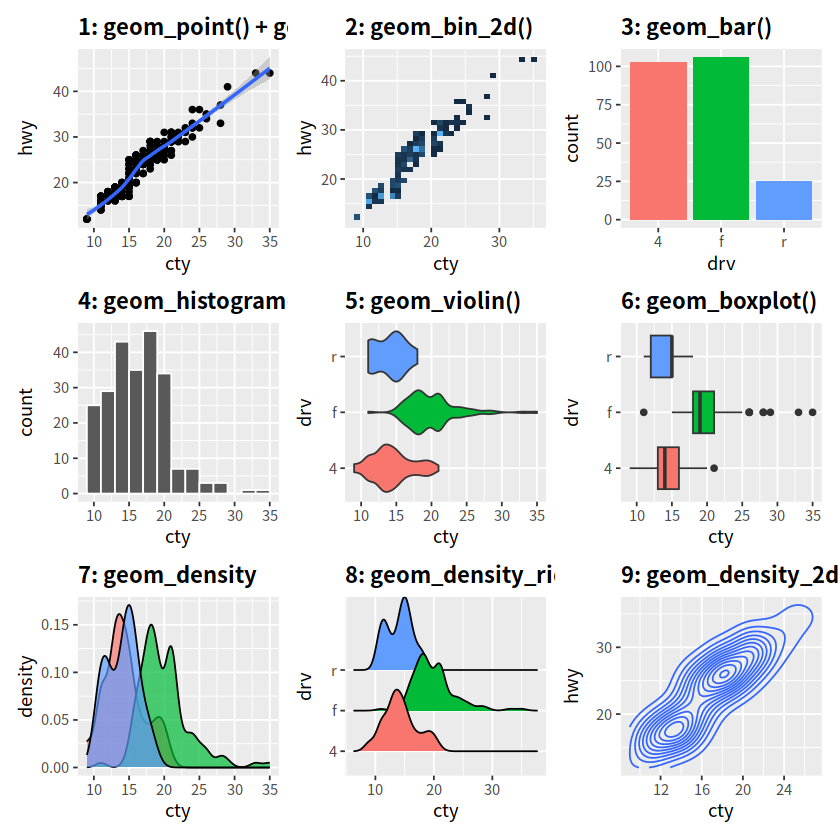

In [8]:
p1 <- ggplot(mpg, aes(x = cty, y = hwy))+
  geom_point()+
  geom_smooth()+
  labs(title = "1: geom_point() + geom_smooth()")+
  theme(plot.title = element_text(face = "bold"))

p2 <- ggplot(mpg, aes(x = cty, y = hwy))+
  geom_bin_2d()+
  labs(title = "2: geom_bin_2d()")+
  guides(fill = FALSE)+
  theme(plot.title = element_text(face = "bold"))

p3 <- ggplot(mpg, aes(x = drv, fill = drv))+
  geom_bar()+
  labs(title = "3: geom_bar()")+
  guides(fill = FALSE)+
  theme(plot.title = element_text(face = "bold"))

p4 <- ggplot(mpg, aes(x = cty))+
  geom_histogram(binwidth = 2, color = "white")+
  labs(title = "4: geom_histogram()")+
  theme(plot.title = element_text(face = "bold"))

p5 <- ggplot(mpg, aes(x = cty, y = drv, fill = drv))+
  geom_violin()+
  labs(title = "5: geom_violin()")+
  guides(fill = FALSE)+
  theme(plot.title = element_text(face = "bold"))

p6 <- ggplot(mpg, aes(x = cty, y = drv, fill = drv))+
  geom_boxplot()+
  labs(title = "6: geom_boxplot()")+
  guides(fill = FALSE)+
  theme(plot.title = element_text(face = "bold"))

p7 <- ggplot(mpg, aes(x = cty, fill = drv))+
  geom_density(alpha = 0.7)+
  labs(title = "7: geom_density")+
  guides(fill = FALSE)+
  theme(plot.title = element_text(face = "bold"))

p8 <- ggplot(mpg, aes(x = cty, y = drv, fill = drv))+
  geom_density_ridges()+
  labs(title = "8: geom_density_ridges")+
  guides(fill = FALSE)+
  theme(plot.title = element_text(face = "bold"))

p9 <- ggplot(mpg, aes(x = cty, y = hwy))+
  geom_density_2d()+
  labs(title = "9: geom_density_2d()")+
  theme(plot.title = element_text(face = "bold"))

p1 + p2 + p3 + p4 + p5 + p6 + p7 + p8 + p9

ggsave("plot.png", width = 15, height = 10, dpi = 600)

In [10]:
mpg %>% head()

manufacturer model displ year cyl trans      drv cty hwy fl class  
1 audi         a4    1.8   1999 4   auto(l5)   f   18  29  p  compact
2 audi         a4    1.8   1999 4   manual(m5) f   21  29  p  compact
3 audi         a4    2.0   2008 4   manual(m6) f   20  31  p  compact
4 audi         a4    2.0   2008 4   auto(av)   f   21  30  p  compact
5 audi         a4    2.8   1999 6   auto(l5)   f   16  26  p  compact
6 audi         a4    2.8   1999 6   manual(m5) f   18  26  p  compact

## 定制
### 1 标签
  `ggtitle("My Plot Title")+
  xlab("The X variable")+
  ylab("The Y variable")`
  
  `labs(title = "My Plot Title", subtitle = "My Plot subtitle", x = "The X Variable", y = "The Y Variable")`

In [11]:
gapdata <- read_csv("./demo_data/gapminder.csv")

Rows: 1704 Columns: 6
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): country, continent
dbl (4): year, lifeExp, pop, gdpPercap

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [12]:
gapdata %>% head()

country     continent year lifeExp pop      gdpPercap
1 Afghanistan Asia      1952 28.801   8425333 779.4453 
2 Afghanistan Asia      1957 30.332   9240934 820.8530 
3 Afghanistan Asia      1962 31.997  10267083 853.1007 
4 Afghanistan Asia      1967 34.020  11537966 836.1971 
5 Afghanistan Asia      1972 36.088  13079460 739.9811 
6 Afghanistan Asia      1977 38.438  14880372 786.1134

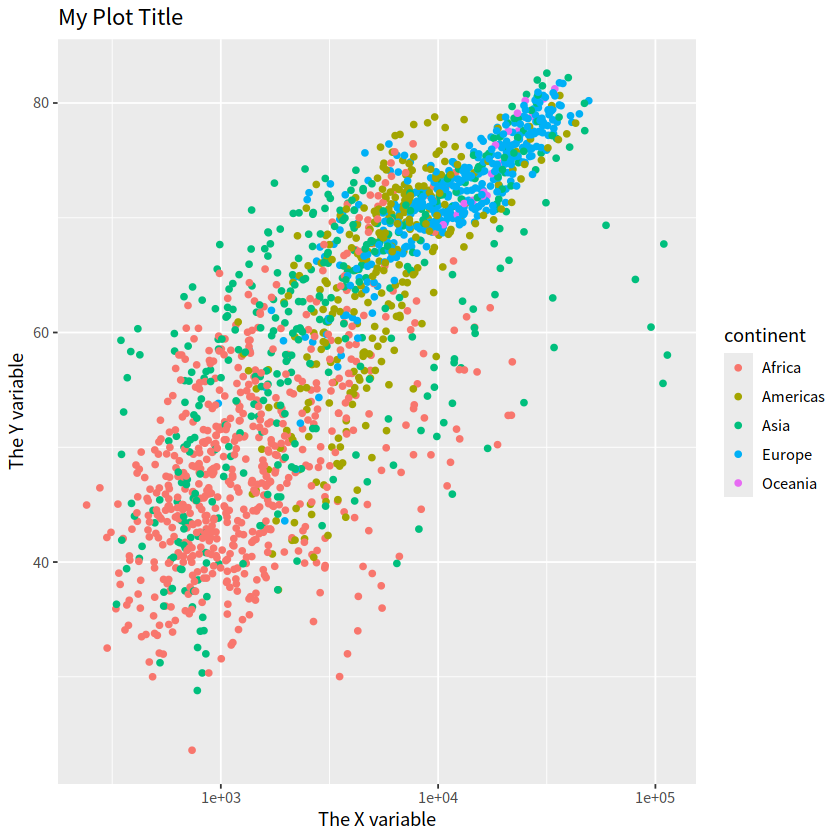

In [13]:
gapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp, color = continent))+
  geom_point()+
  scale_x_log10()+
  ggtitle("My Plot Title")+
  xlab("The X variable")+
  ylab("The Y variable")

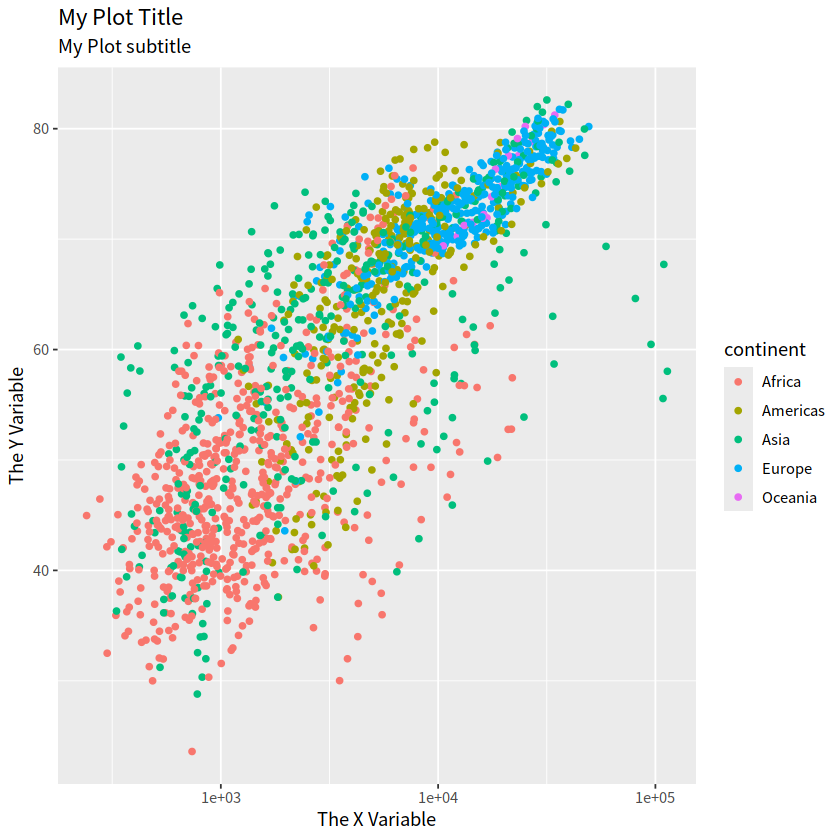

In [14]:
gapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp, color = continent))+
  geom_point()+
  scale_x_log10()+
  labs(title = "My Plot Title",
       subtitle = "My Plot subtitle",
       x = "The X Variable", y = "The Y Variable")

### 2 定制颜色
- 自定义颜色 `scale_color_manual()` 和 `scale_fill_manual()`
- 已有颜色系统
  - 离散型变量 `scale_color_viridis_d()`
  - 连续型变量 `scale_color_viridis_c()`

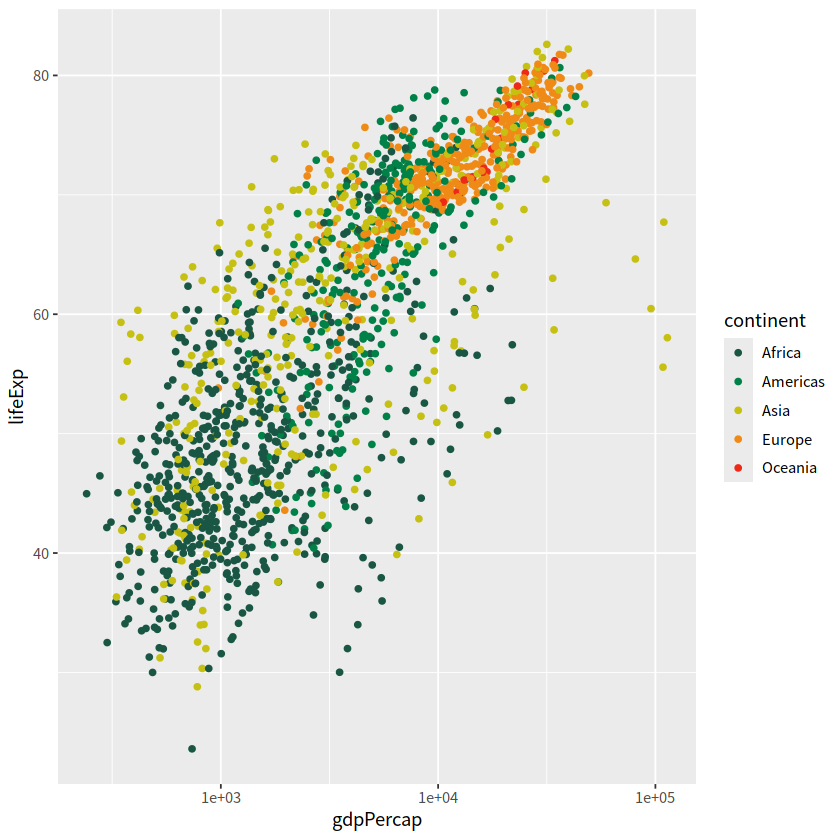

In [15]:
gapdata %>%
  ggplot(aes(x = gdpPercap, y = lifeExp, color = continent)) +
  geom_point() +
  scale_x_log10() +
  scale_color_manual(values = c("#195744", "#008148", "#C6C013", "#EF8A17", "#EF2917"))

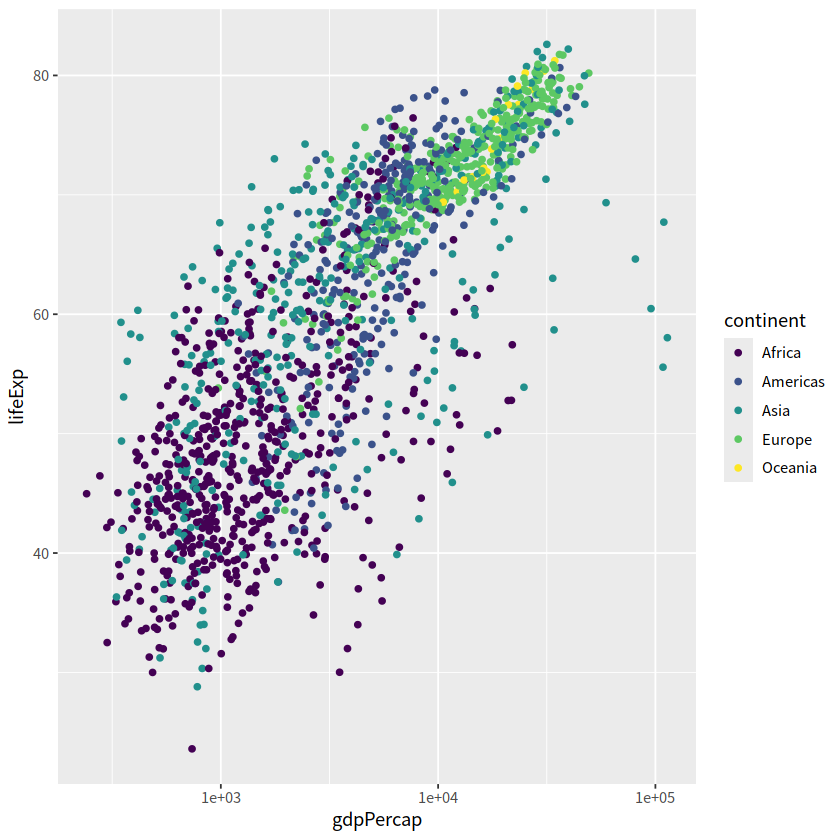

In [17]:
gapdata %>%
  ggplot(aes(x = gdpPercap, y = lifeExp, color = continent)) +
  geom_point() +
  scale_x_log10() +
  scale_color_viridis_d()

##  组合图片
我们有时候想把多张图组合到一起
### 1 `cowplot`
可以使用 `cowplot` 宏包的`plot_grid()`函数完成多张图片的组合，使用方法很简单。

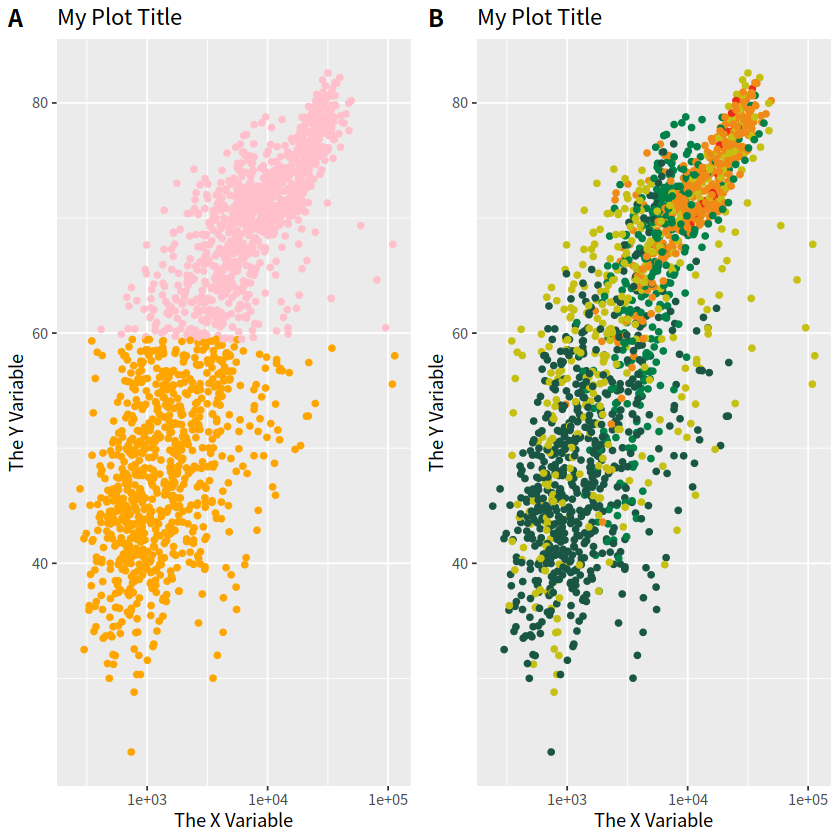

In [19]:
library(cowplot)

p1 <- gapdata %>% 
  ggplot(aes(x = gdpPercap, y = lifeExp))+
  geom_point(aes(color = lifeExp > mean(lifeExp)))+
  scale_x_log10()+
  theme(legend.position = "none")+
  scale_color_manual(values = c("orange", "pink"))+
  labs(title = "My Plot Title", x = "The X Variable", y = "The Y Variable")

p2 <- gapdata %>%
  ggplot(aes(x = gdpPercap, y = lifeExp, color = continent)) +
  geom_point() +
  scale_x_log10() +
  scale_color_manual(values = c("#195744", "#008148", "#C6C013", "#EF8A17", "#EF2917")) +
  theme(legend.position = "none") +
  labs(title = "My Plot Title",
    x = "The X Variable",
    y = "The Y Variable")

cowplot::plot_grid(p1, p2, labels = c("A", "B"))

也可以使用`patchwork`宏包，方法更简单

`plot_layout(guides = "collect")` 表示将所有组合在一起的图形共享的图例合并到一个位置显示。

`plot_annotation(tag_levels = "A", title = "",subtitle = "",caption = "")`，用于对组合图的注释

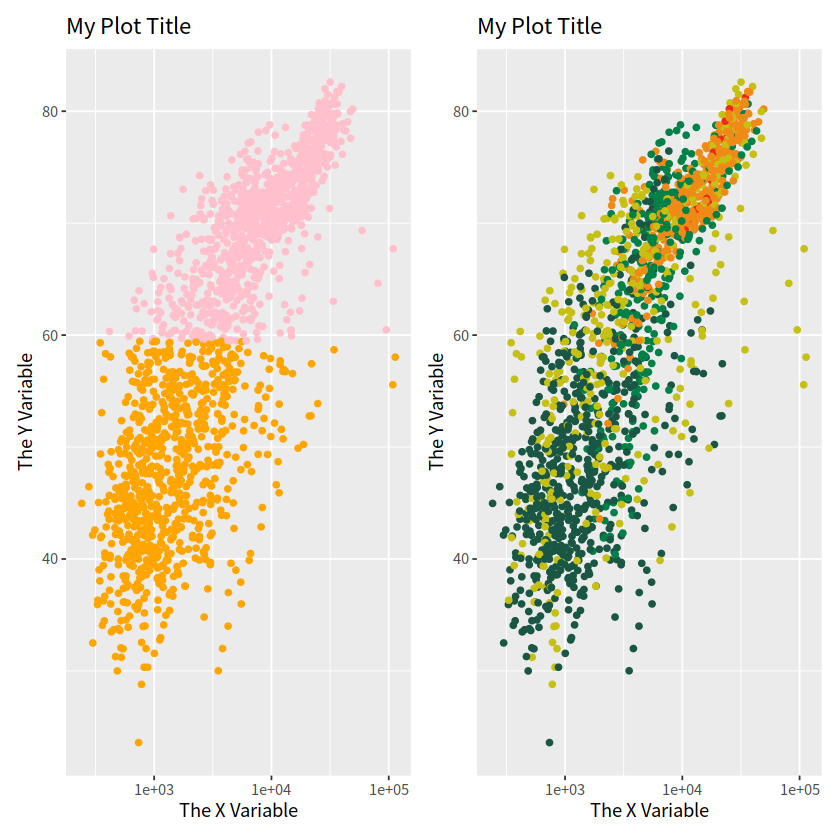

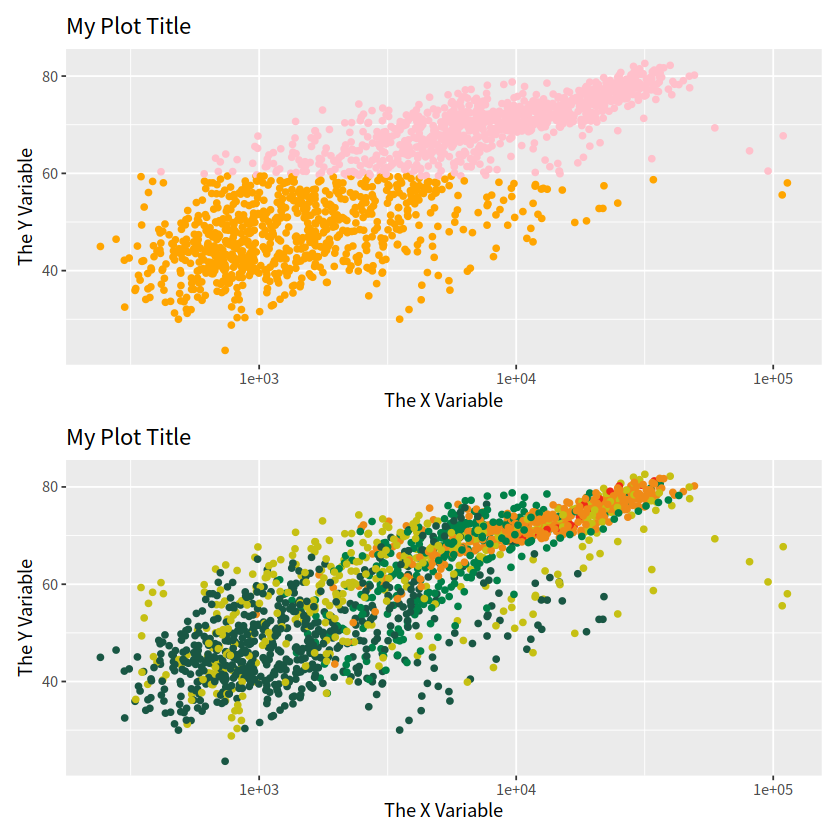

In [21]:
library(patchwork)

p1 + p2

p1 / p2

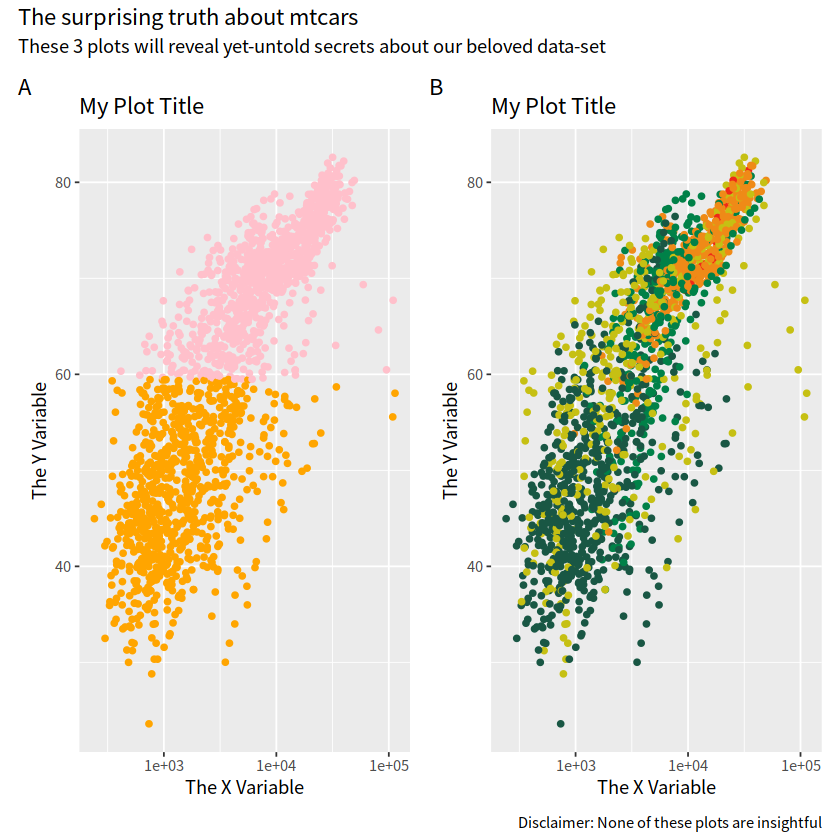

In [22]:
p1 + p2 +
  plot_annotation(tag_levels = "A", 
                  title = "The surprising truth about mtcars",
                  subtitle = "These 3 plots will reveal yet-untold secrets about our beloved data-set",
                  caption = "Disclaimer: None of these plots are insightful")

Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_point()`).”


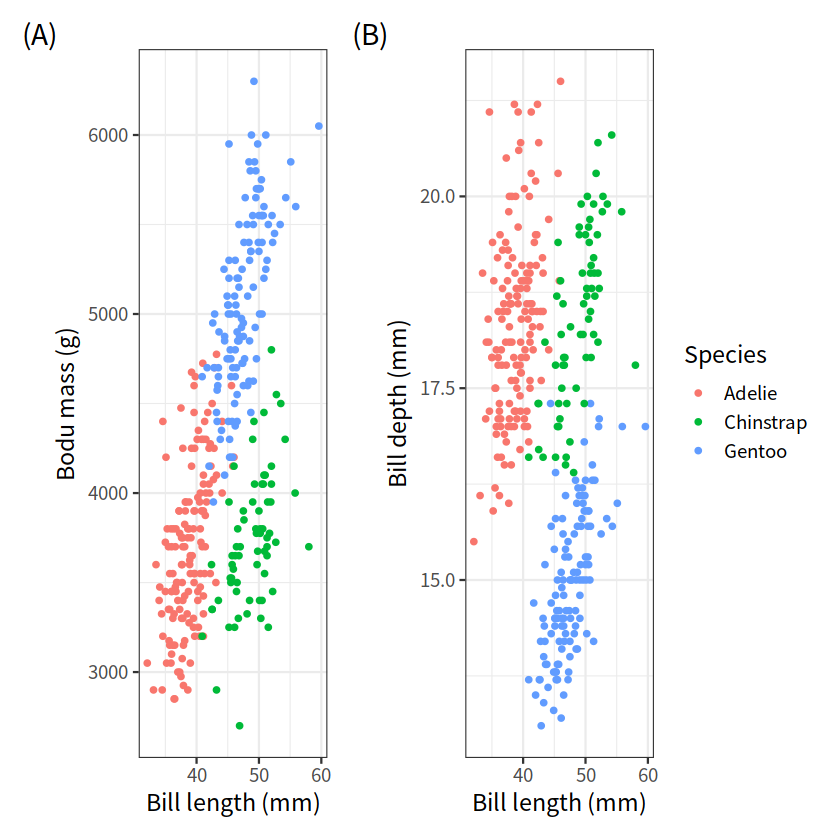

In [23]:
library(palmerpenguins)

g1 <- penguins %>% 
  ggplot(aes(bill_length_mm, body_mass_g, color = species))+
  geom_point()+
  theme_bw(base_size = 14)+
  labs(x = "Bill length (mm)", y = "Bodu mass (g)",
       tag = "(A)", color = "Species")

g2 <- penguins %>% 
  ggplot(aes(bill_length_mm, bill_depth_mm, color = species))+
  geom_point()+
  theme_bw(base_size = 14)+
  labs(x = "Bill length (mm)", y = "Bill depth (mm)",
       tag = "(B)", color = "Species")

g1 + g2 + patchwork::plot_layout(guides = "collect")

`patchwork` 使用方法很简单![image.png](image/patchwork.png)

## 高亮某一组
画图很容易，然而画一张好图，不容易。图片质量好不好，其原则就是**不增加看图者的心智负担**，有些图片的色彩很丰富，然而需要看图人配合文字和图注等信息才能看懂作者想表达的意思，这样就失去了图片“一图胜千言”的价值。

分析数据过程中，我们可以使用高亮我们某组数据，**突出**我们想表达的信息，是非常好的一种可视化探索手段。

### 1 `ggplot2`方法
这种方法是将**背景部分**和**高亮部分**分两步来画

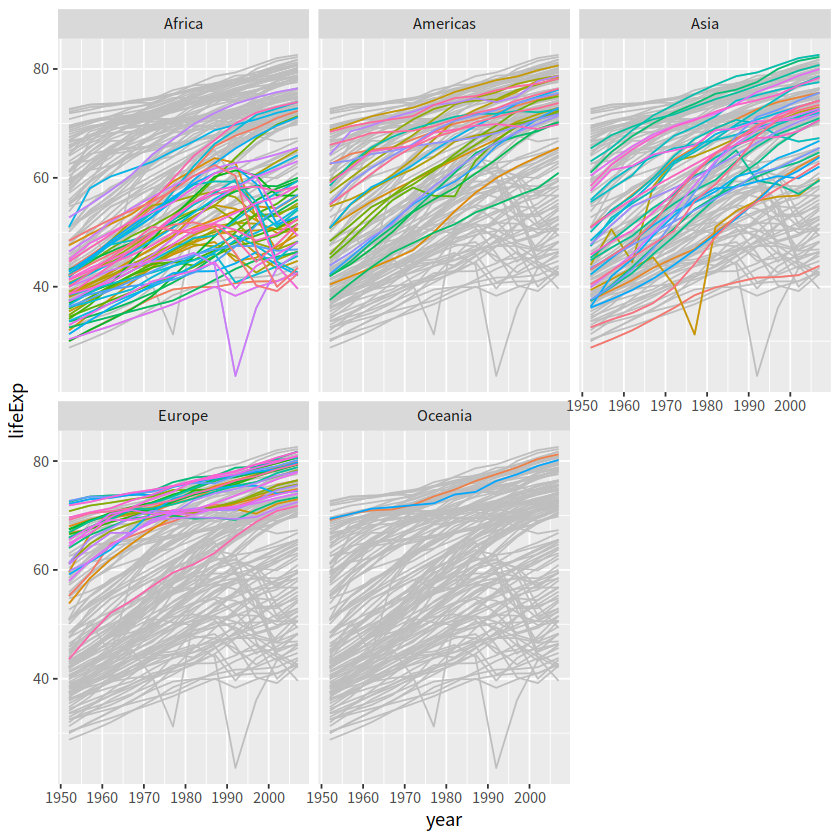

In [29]:
drop_facet <- function(x) select(x, -continent)

gapdata %>% 
  ggplot()+
  geom_line(data = drop_facet, 
            aes(x = year, y = lifeExp, group = country), color = "grey")+
  geom_line(aes(x = year, y = lifeExp, color = country, group = country))+
  facet_wrap(vars(continent))+
  theme(legend.position = "none")

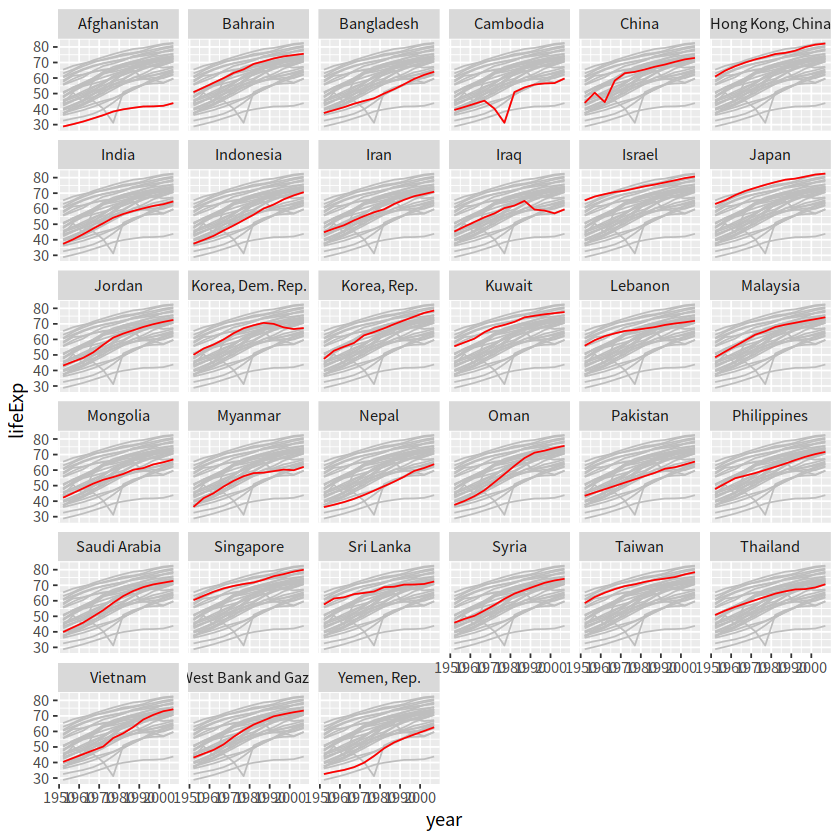

In [43]:
gapdata %>% 
  mutate(group = country) %>% 
  filter(continent == "Asia") %>% 
  ggplot()+
  geom_line(data = function(d) select(d, -country), 
            aes(x = year, y = lifeExp, group = group), color = "grey")+
  geom_line(aes(x = year, y = lifeExp, group = country), color = "red")+
  facet_wrap(vars(country))+
  theme(legend.position = "none")

### .2 gghighlight方法
这里推荐`gghighlight`宏包

- dplyr has filter()
- ggplot has Highlighting

In [31]:
gapdata %>% 
  filter(country == "China")

country continent year lifeExp  pop        gdpPercap
1  China   Asia      1952 44.00000  556263527  400.4486
2  China   Asia      1957 50.54896  637408000  575.9870
3  China   Asia      1962 44.50136  665770000  487.6740
4  China   Asia      1967 58.38112  754550000  612.7057
5  China   Asia      1972 63.11888  862030000  676.9001
6  China   Asia      1977 63.96736  943455000  741.2375
7  China   Asia      1982 65.52500 1000281000  962.4214
8  China   Asia      1987 67.27400 1084035000 1378.9040
9  China   Asia      1992 68.69000 1164970000 1655.7842
10 China   Asia      1997 70.42600 1230075000 2289.2341
11 China   Asia      2002 72.02800 1280400000 3119.2809
12 China   Asia      2007 72.96100 1318683096 4959.1149

Warning message:
“Tried to calculate with group_by(), but the calculation failed.
Falling back to ungrouped filter operation...”


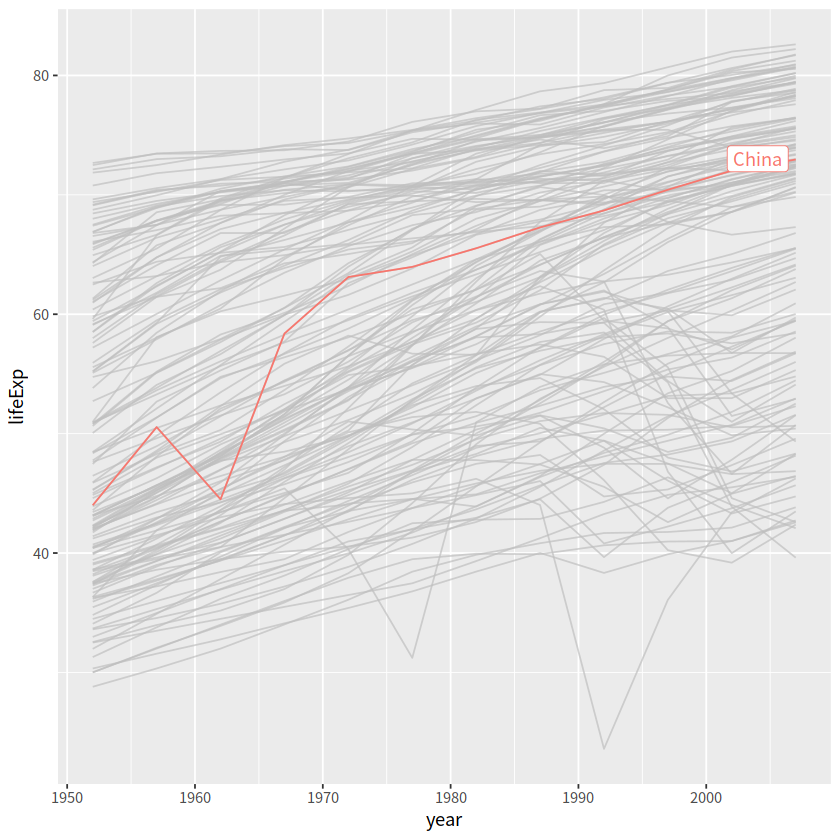

In [32]:
gapdata %>% 
  ggplot(aes(x = year, y = lifeExp, 
             color = continent, group = country))+
  geom_line()+
  gghighlight(country == "China", label_key = country)

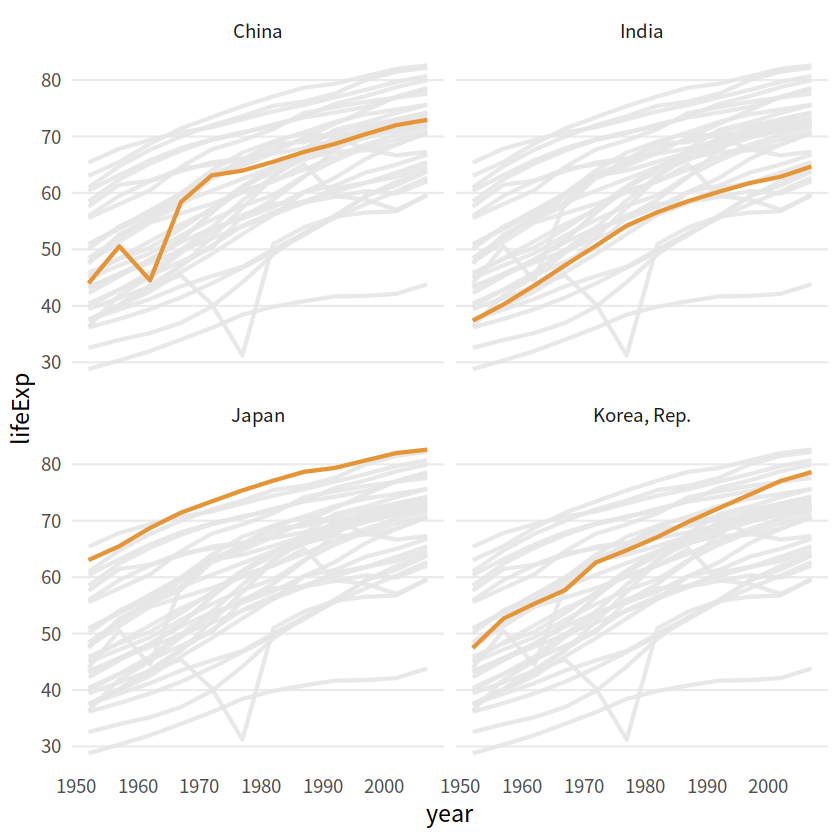

In [45]:
gapdata %>% 
  filter(continent == "Asia") %>% 
  ggplot(aes(year, lifeExp, color = country, group = country))+
  geom_line(size = 1.2, alpha = 0.9, color = "#E58C23")+
  theme_minimal(base_size = 14)+
  theme(legend.position = "none",
        panel.grid.major.x = element_blank(), 
        panel.grid.minor = element_blank()  
        )+
  gghighlight(country %in% c("China", "India", "Japan", "Korea, Rep."),
              use_group_by = FALSE,
              use_direct_label = FALSE, 
              unhighlighted_params = list(color = "grey90")
             )+
  facet_wrap(vars(country))

## 3D效果
`ggfx::with_shadow()`

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


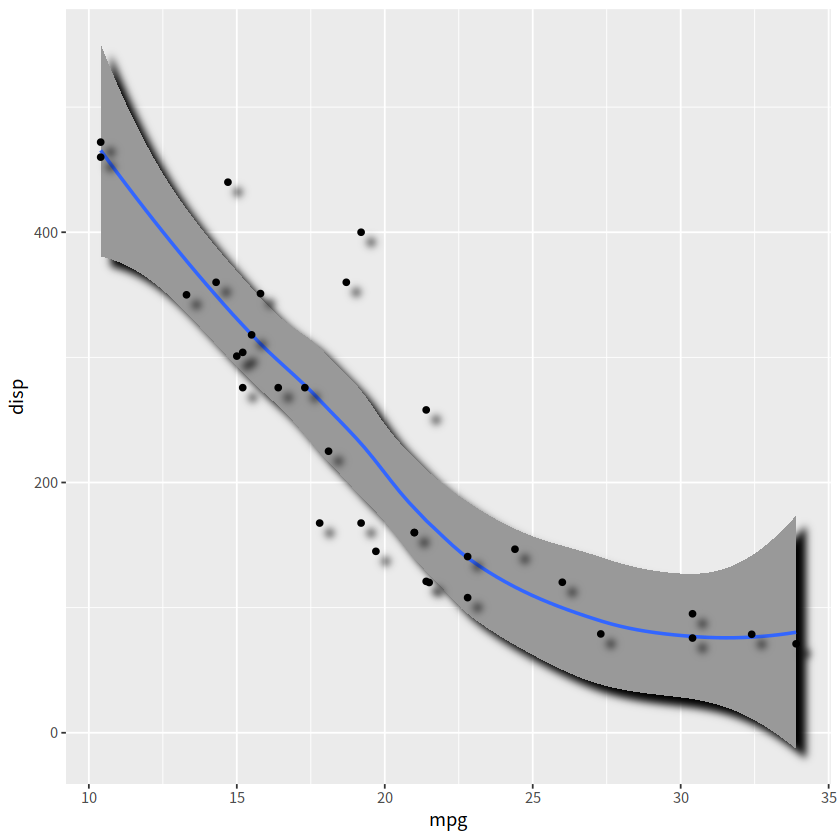

In [48]:
library(ggfx)

mtcars %>% 
  ggplot(aes(mpg, disp))+
  ggfx::with_shadow(geom_smooth(alpha = 1), sigma = 4)+
  ggfx::with_shadow(geom_point(), sigma = 4)

## 弯曲文本
弯曲文本，使其匹配多种图形的轨迹。

`geomtextpath::geom_textdensity()`

`geomtextpath::geom_labelsmooth()`

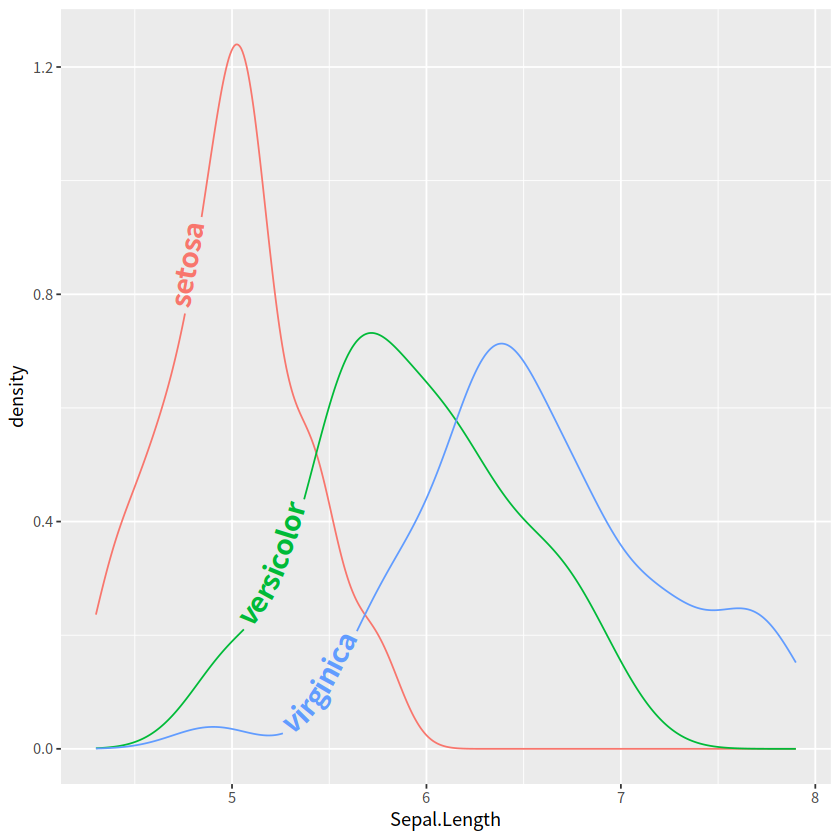

In [53]:
# install.packages("geomtextpath")
library(geomtextpath)

iris %>% 
  ggplot(aes(x = Sepal.Length, color = Species, label = Species))+
  geomtextpath::geom_textdensity(size = 6, fontface = 2, 
                                 hjust = 0.2 , vjust = 0.3)+
  theme(legend.position = "none")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_point()`).”


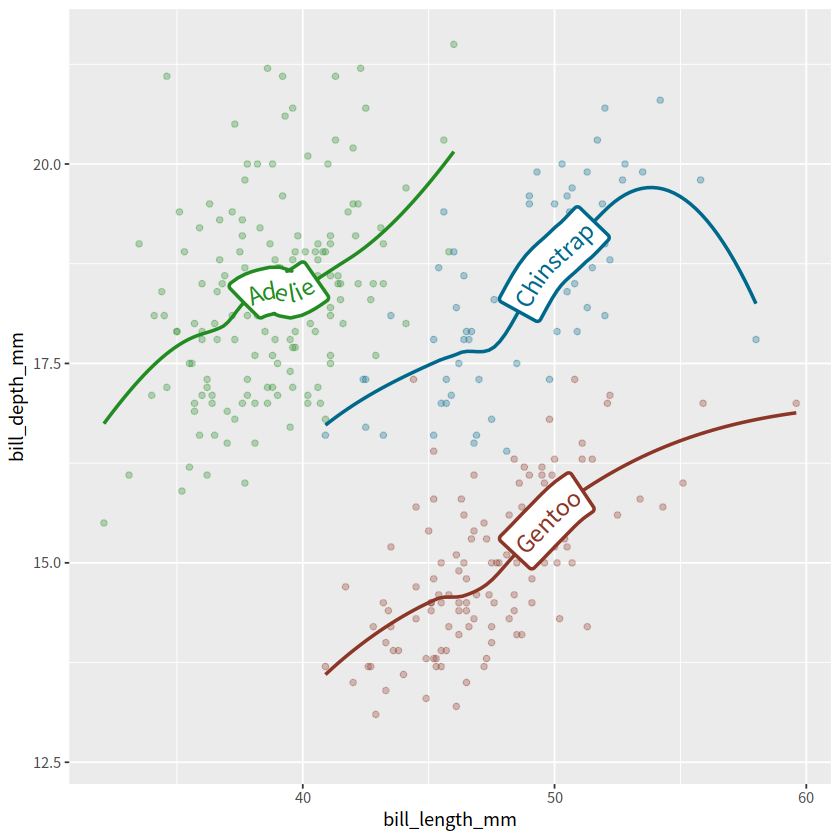

In [54]:
library(palmerpenguins)

penguins %>% 
  ggplot(aes(x = bill_length_mm, y = bill_depth_mm, color = species))+
  geom_point(alpha = 0.3)+
  geom_labelsmooth(aes(label = species), method = "loess", 
                   size = 5, linewidth = 1)+
  scale_color_manual(values = c("forestgreen", "deepskyblue4", "tomato4"))+
  theme(legend.position = "none")

## 函数图
`stat_function()`

有时候我们想画一个函数图，比如正态分布的函数，可能会想到先产生数据，然后画图，比如下面的代码

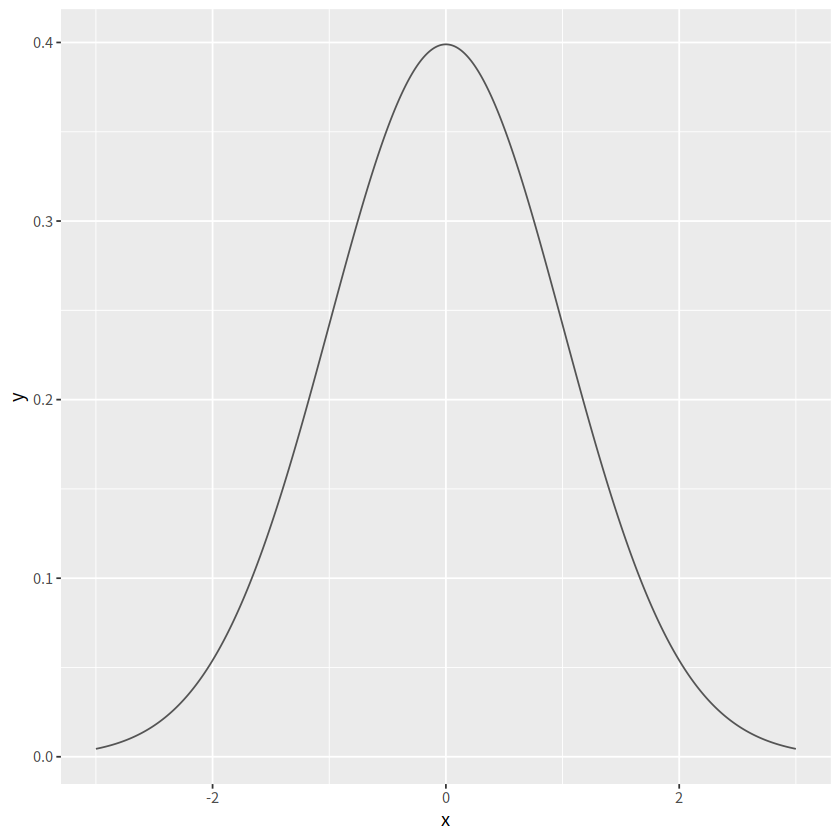

In [55]:
tibble(x = seq(from = -3, to = 3, by = 0.01)) %>% 
  mutate(y = dnorm(x, mean = 0, sd = 1)) %>% 
  ggplot(aes(x = x, y = y))+
  geom_line(color = "grey33")

事实上，`stat_function()`可以简化这个过程

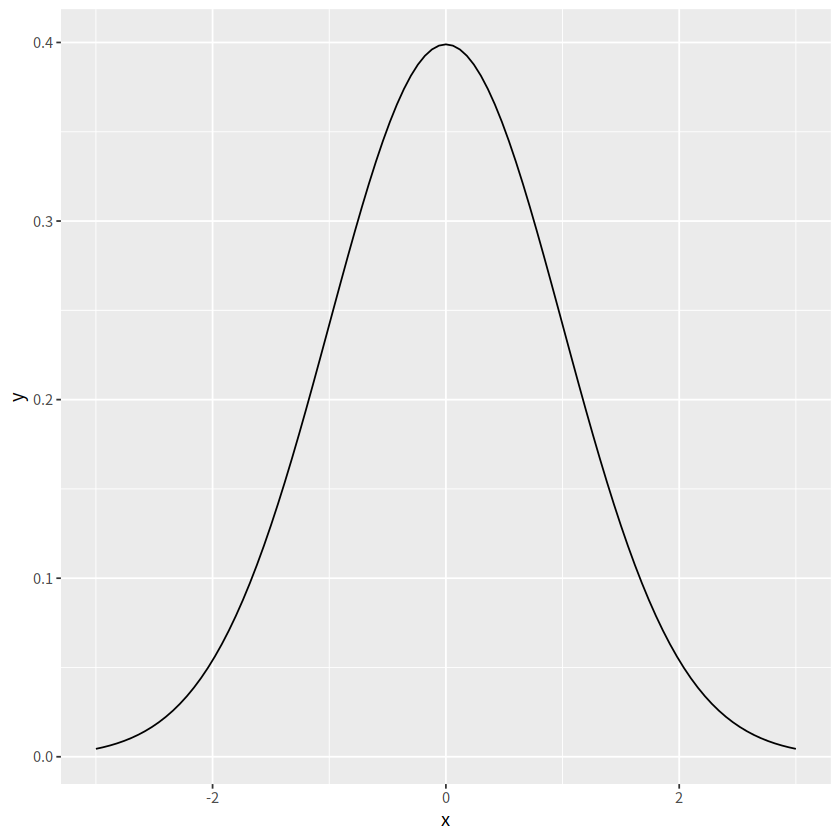

In [56]:
ggplot(data = data.frame(x = c(-3,3)), aes(x = x))+
  stat_function(fun = dnorm)

支持绘制自定义函数

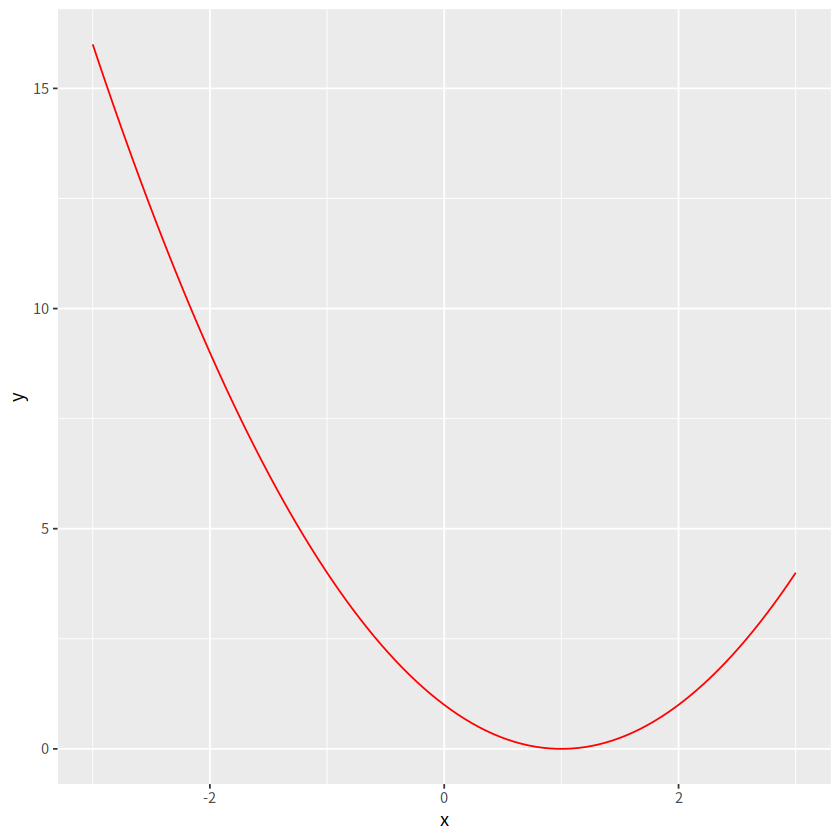

In [58]:
myfun <- function(x){
    (x -1)**2
}

ggplot(data = data.frame(x = c(-3, 3)), aes(x = x))+
  stat_function(fun = myfun, 
                geom = "line", color = "red")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


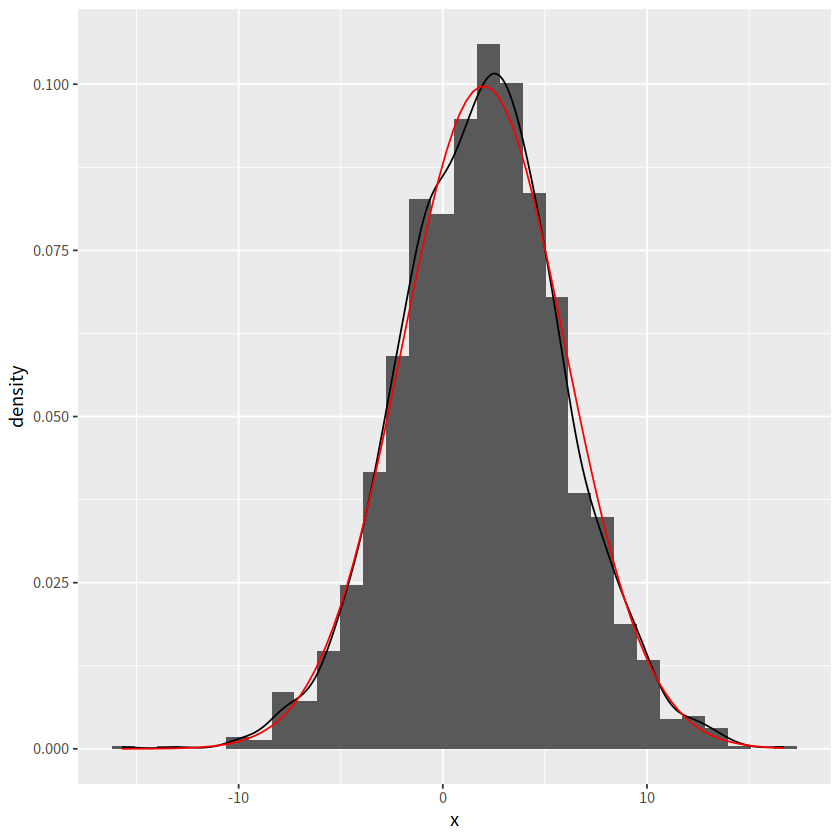

In [63]:
d <- tibble(x = rnorm(2000, mean = 2, sd = 4))

ggplot(d, aes(x = x))+
  geom_histogram(aes(y = after_stat(density)))+
  geom_density()+
  stat_function(fun = dnorm, args = list(mean = 2, sd = 4),
                color = "red")

##  latex公式

Warning message in is.na(x):
“is.na()不适用于类别为'expression'的非串列或非矢量”


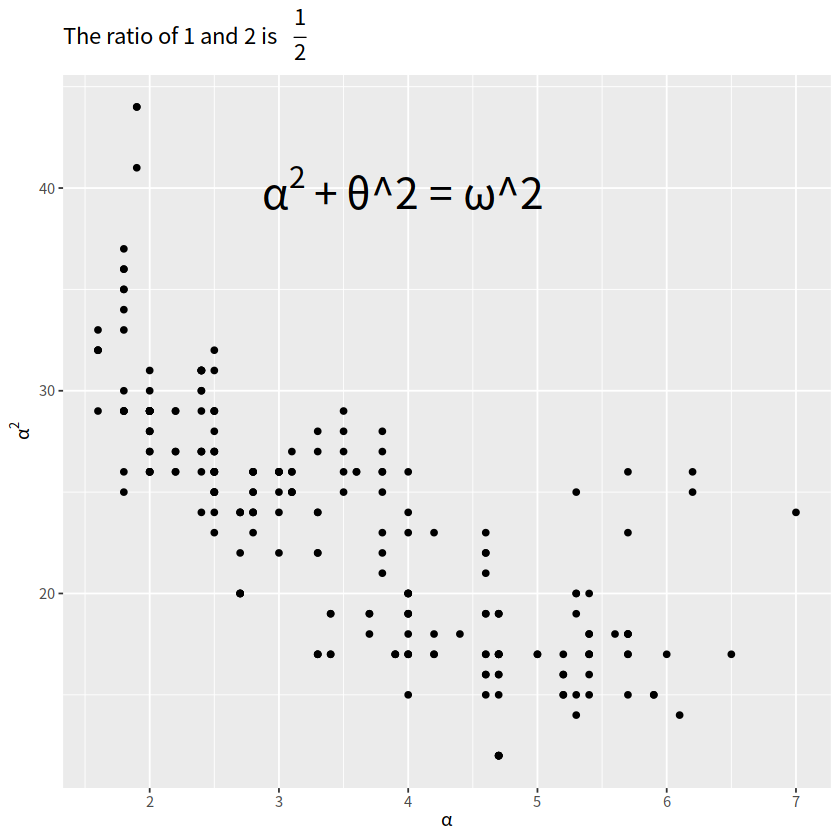

In [66]:
library(ggplot2)
library(latex2exp)
  
ggplot(mpg, aes(x = displ, y = hwy))+
  geom_point()+
  annotate("text", x = 4, y = 40,
           label = TeX("$\\alpha^2 + $\\theta^2 = \\omega^2 $"),
           size = 9)+
  labs(title = TeX("The ratio of 1 and 2 is $\\,\\, \\frac{1}{2}$"),
       x = TeX("$\\alpha$"),
       y = TeX("$\\alpha^2$"))

## “coord_cartesian() 与 scale_x_continuous()”
乍一看，这两个操作没有区别

Warning message:
“Removed 24 rows containing missing values or values outside the scale range (`geom_point()`).”


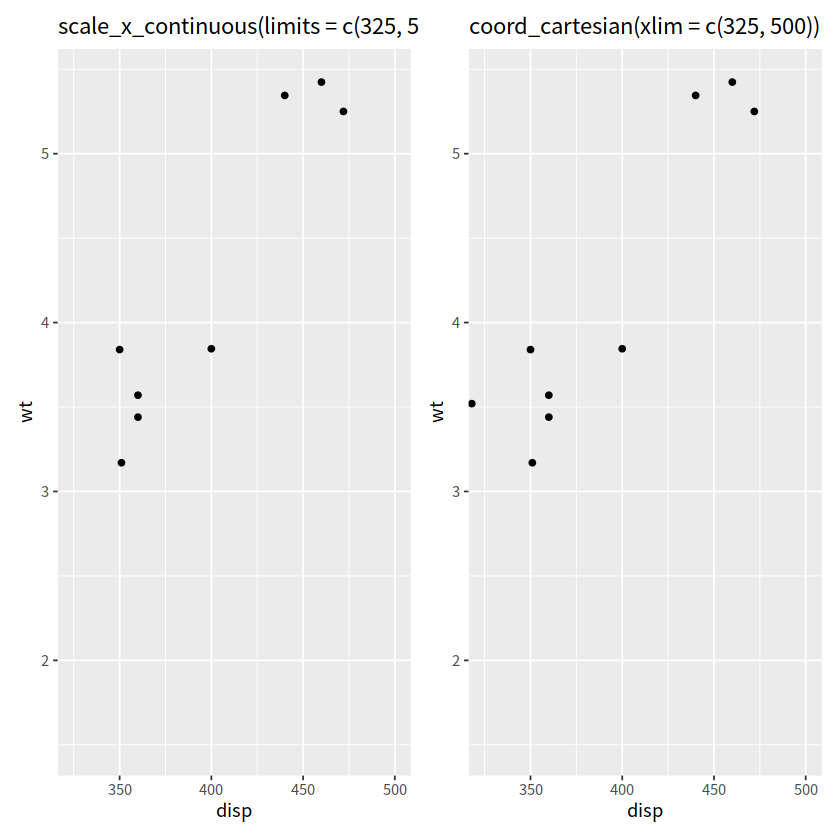

In [67]:
p1 <- mtcars %>% 
  ggplot(aes(disp, wt))+
  geom_point()+
  scale_x_continuous(limits = c(325, 500))+
  ggtitle("scale_x_continuous(limits = c(325, 500))")

p2  <- mtcars %>% 
  ggplot(aes(disp, wt))+
  geom_point()+
  coord_cartesian(xlim = c(325, 500))+
  ggtitle("coord_cartesian(xlim = c(325, 500))")


p1 + p2

实际上这两个操作，区别蛮大的